# NBA All-Star Evolution <img src="https://content.sportslogos.net/logos/6/980/full/4585__nba_all-star_game-secondary-2021.png" alt="NBA All-Star logo" style="float: right; width: 12%;">

### <span style="color:#83898b">*NBA All-Star Teams and the Evolution of 3-Point Shooting*</span>
*NAME: Adlene Abdelghani Oudahmane*

The NBA All-Star Game, which has featured the greatest players in the league in a thrilling East vs. West format. Immense rivalry between Bill Russell and Wilt Chamberlain and the brilliance of brilliance Johnson and Larry Bird in the 1980s are only two examples of the memorable moments the game has produced. A significant step forward in globalisation was taken in 1992 with the introduction of the "Dream Team" at the Olympics in Barcelona, which included luminaries such as Michael Jordan. The All-Star Game, which features the best players, has come to represent the NBA's global influence. It is still a worldwide spectacle that unites fans from all around the world thanks to players like LeBron James and Kobe Bryant. This project explores the rich history of the NBA, concentrating on the highly regarded NBA All-Star Game, which has been a staple of basketball culture since the league's founding in 1951. The All-Star Game is a showcase for the best players in the league and represents the pinnacle of basketball performance. Analysing each team's impact on NBA All-Star choices is the goal of the study, which is similar to examining the various contributions of NBA players.Further down into our investigation is a careful analysis of the All-Star selection procedure, with a focus on the development of 3-point shooting statistics. Finding subtle patterns that shed light on the complex dynamics of team contributions and the dynamic tactics around 3-point shooting in the NBA is the goal.

## Methods
### Data Collection

A subset of data from the Titanic is maintained publicly at [Rdatasets](https://vincentarelbundock.github.io/Rdatasets/), a free online resource of general datasets [1].

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [10]:
NBA = pd.read_csv("final_data.csv")

### Data Cleaning

The NBA All-Star dataset initially had columns with unclear names, prompting me to rename them. To streamline the analysis, I selectively chose relevant columns and created a new column by combining the first and last names. Additionally, for clearer printing outputs, I adjusted the floating-point precision.


In [11]:
#adjucting floating-point precision
pd.set_option('display.precision', 2)

#Selecting specified columns
selected_columns = ['first', 'last', 'team', 'year', 'games_played', 'fg3m', 'pts']
NBA = NBA[selected_columns]

# combining first and last together and making it the first column
NBA['full_name'] = NBA['first'] + ' ' + NBA['last']
NBA = NBA.drop(['first', 'last'], axis=1)
columns_order = ['full_name'] + [col for col in NBA.columns if col != 'full_name']
NBA = NBA[columns_order]

#Renaming columns for clarity
NBA.columns = ["full_name", "team", "year", "games_played", "average_3pointers", "average_points"]



This database includes a player with missing values in the statistical data, while retaining information such as name, year, and team. I plan to utilize this player for the initial observation of NBA teams but will exclude them from the second analysis.

In [12]:
#checking for Nan
NBA[NBA.average_points.isna()]


,full_name,team,year,games_played,average_3pointers,average_points
261,Magic Johnson,LAL,1991,NaN,NaN,NaN


## Analyses

This database encompasses the complete roster of NBA All-Star players spanning the years 1980 to 2022.


I will examine the player contributions from each team to the NBA All-Star selections and track the evolution of 3-point scoring across different eras.


### Distributions
I will begin by exploring the number of All-Starts from each team.

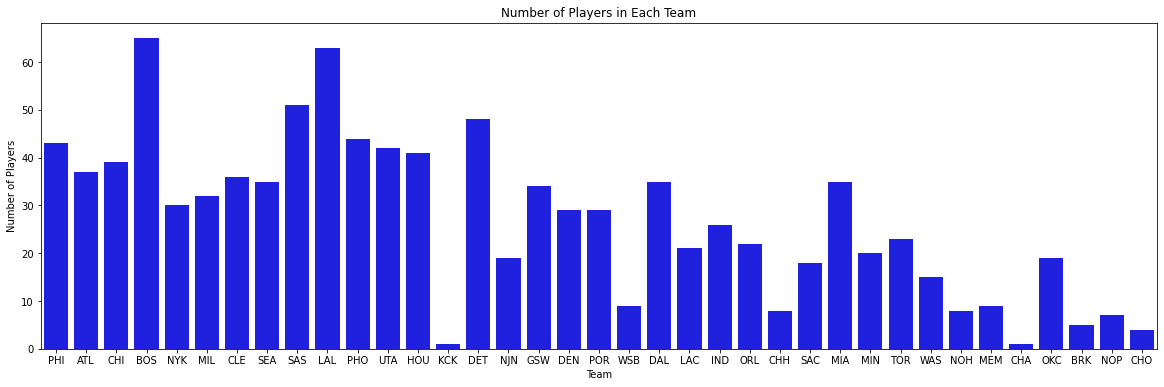

In [13]:
# Grouping by team and counting the number of All-Stars

#size of the graph
plt.figure(figsize=(20, 6))

# Plotting the countplot with Seaborn
sns.countplot(data=NBA, x="team", color='blue')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each Team')
plt.show()

The table below presents number of All-Starts from each team.

In [14]:
counts = NBA['team'].value_counts().reset_index().rename(columns={'index': 'teams', 'team': 'count'})
# Displaying the resulting DataFrame
display(counts)

,teams,count
0,BOS,65
1,LAL,63
2,SAS,51
3,DET,48
4,PHO,44
5,PHI,43
6,UTA,42
7,HOU,41
8,CHI,39
9,ATL,37


dropping Magic Johnson from the our data

In [15]:
NBA = NBA.dropna(axis=0)

evolution of the 3 pointer throughtout the years graph

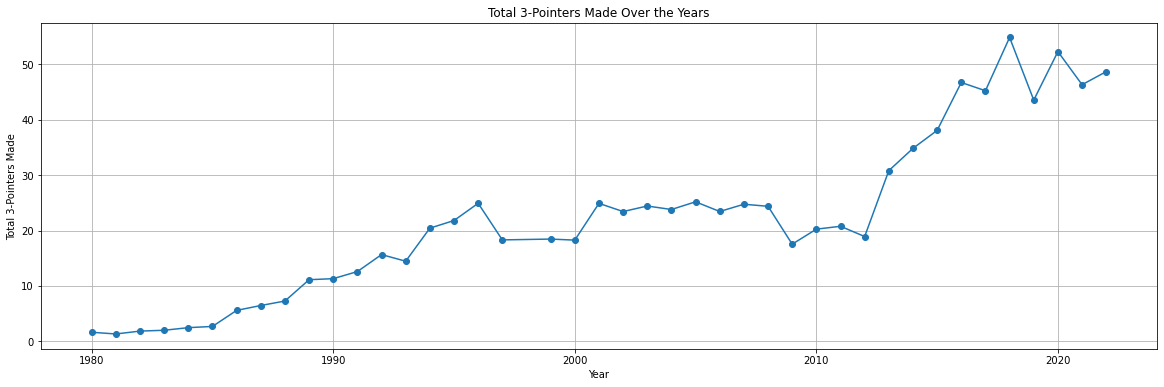

In [16]:
grouped_data = NBA.groupby('year')

# Step 2: Calculate total 3-pointers made per year
total_3_pointers_per_year = grouped_data['average_3pointers'].sum().reset_index()

# Step 3: Visualize the change over time
plt.figure(figsize=(20, 6))
plt.plot(total_3_pointers_per_year['year'], total_3_pointers_per_year['average_3pointers'], marker='o')
plt.title('Total 3-Pointers Made Over the Years')
plt.xlabel('Year')
plt.ylabel('Total 3-Pointers Made')
plt.grid(True)
plt.show()

## Discussion ##

For this analysis, I dug into the NBA All-Star database and found intriguing relationships between All-Star contributions and team performance. The Lakers and Celtics were shown in the graphs as perennial challengers, with the former having the greatest player contributions to the All-Star squad and the latter having won the most NBA championships. The strong link between individual brilliance and team success is shown by the association between continuous team achievement and being selected to the All-Star squad. The graphs also showed a noteworthy anomaly for 2013, which was ascribed to Stephen Curry's extraordinary three-point shooting ability, which not only made him the league's best shooter but also would later make him MVP. This crucial year perfectly captures the NBA's dynamic character and the ongoing development of extraordinary talent that is rewriting the league's history.

## References
1. Source data - https://www.kaggle.com/
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz 